
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Mar 13, 2020)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [2]:
import math as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

poll = pd.read_csv('poll-larger.csv')
poll['vote'].value_counts(normalize=True)

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64

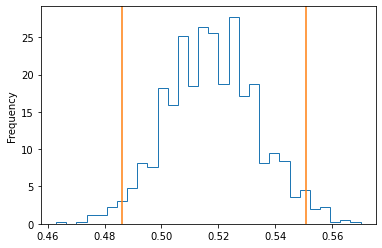

In [3]:
def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Orgeron','Saban')})
s = sample(0.5181,n=1000)
s['vote'].value_counts(normalize=True)
df = pd.DataFrame([sample(0.5181)['vote'].value_counts(normalize=True) for i in range(1000)])

df['Orgeron'].plot(kind='hist',histtype='step',bins=30, density=True)
plt.axvline(df['Orgeron'].quantile(0.025), c='C1',linestyle='-')
plt.axvline(df['Orgeron'].quantile(0.975), c='C1',linestyle='-')

In [4]:
def samplingdist(orgeronWinPercent,n=1000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])

def quantiles(orgeronWinPercent,n=1000):
    df = samplingdist(orgeronWinPercent,n)
    return df['Orgeron'].quantile(0.025), df['Orgeron'].quantile(0.975), df['Orgeron'].quantile(0.5)

print(f'The confidence interval lies between the first two values{quantiles(0.5181)} with the last value being the estimation point')

The confidence interval lies between the first two values(0.487975, 0.548025, 0.518) with the last value being the estimation point
